## Handwritten digits.

Sometimes you might want to apply multiple ML techniques. For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well.  So, you might want to start with a clustering or dimensional reduction algorithm first.

Here we're going to use the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face. 

Let's load the dataset first.

### Tasks. Part 0.

1) First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer! 

**Spoiler alert: Davide's efficiency was ~80%, much worse than ML!**


2) Here is how you plot the images and the corresponding labels  (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.  


### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&q=a+global+geometric+framework+for+nonlinear+dimensionality+reduction&btnG=).


### Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'` (I found the default solver had a bug, at least when I tried).

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?


There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weeks.

In [53]:
import numpy as np
import sklearn
from sklearn import datasets, neighbors
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [54]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


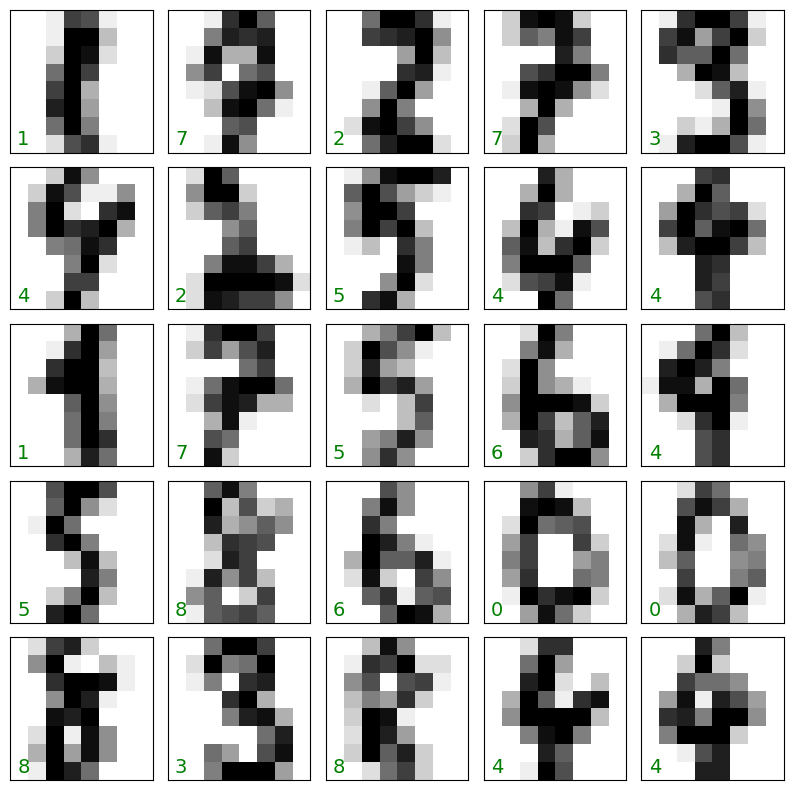

In [55]:
fig, axes = plt.subplots(5,5, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

## Dimensionality reduction: Isomap

In [56]:
#let's do dimensionality reduction --> embedding technique

embedding = sklearn.manifold.Isomap(n_neighbors = 5, n_components=2)
digits_transformed = embedding.fit_transform(digits.data)
digits_transformed.shape

/home/malvi/venv/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/malvi/venv/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

In [68]:
print(digits_transformed)
X= digits_transformed
y = digits.target

[[164.62462575  28.93626891]
 [-46.60793919  48.5488642 ]
 [-97.56429716  21.78489563]
 ...
 [-50.06298374 -24.69249019]
 [ -1.62491362 -72.07151534]
 [ -9.97009486 -37.11642611]]


Text(0, 0.5, 'component 2')

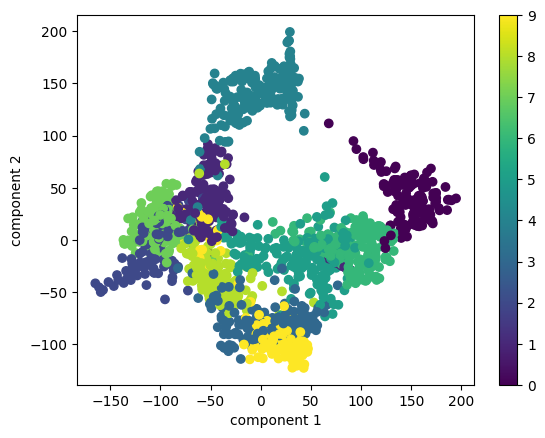

In [69]:
plt.scatter(digits_transformed[:,0],digits_transformed[:,1],c=digits.target)
plt.colorbar()
plt.xlabel('component 1')
plt.ylabel('component 2')

## supervised learning: classification

In [70]:
x_train, x_test, y_train, y_test =  sklearn.model_selection.train_test_split(X, y, test_size = 0.2)
print(x_train.shape)

(1437, 2)


In [71]:
#classification: LogisticRegression

clf = LogisticRegression(solver ='sag', max_iter = 1000)
#clf = neighbors.KNeighborsClassifier(n_neighbors=3)

clf.fit(x_train, y_train)



/home/malvi/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag')

In [75]:
y_pred_train = clf.predict(x_train)
print("CONFUSION MATRIX: \n", confusion_matrix(y_train, y_pred_train))
print("accuracy score on train set: ", sklearn.metrics.accuracy_score(y_train, y_pred_train))

print('\n---------------------------------------\n')

y_pred_test = clf.predict(x_test)
print("CONFUSION MATRIX: \n", confusion_matrix(y_test, y_pred_test))
print("accuracy score on test set: ", sklearn.metrics.accuracy_score(y_test, y_pred_test))


CONFUSION MATRIX: 
 [[135   0   0   0   1   0   6   0   0   0]
 [  0  99   4   0   5   0  20  13   2   0]
 [  0   5  91   0   0   0   0  51   4   0]
 [  0   0   1   0   0   5   0   0  13 116]
 [  0   3   1   0 144   0   0   1   0   0]
 [  3   7   0   0   0 109  23   0   3   2]
 [  7   4   0   0   0  18 119   0   0   0]
 [  0   3  54   0   0   0   0  78   3   0]
 [  0   3   7   0   0   3   0   0 111   9]
 [  0   7   4   0   0   0   0   8   7 125]]
accuracy score on train set:  0.7035490605427975

---------------------------------------

CONFUSION MATRIX: 
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  2  1  6  1  0  0]
 [ 0  0 13  0  0  0  0 13  0  0]
 [ 0  0  0  0  0  0  0  0  3 45]
 [ 0  1  0  0 31  0  0  0  0  0]
 [ 1  6  0  0  0 22  4  0  0  2]
 [ 3  0  0  0  0  4 26  0  0  0]
 [ 0  0 28  0  0  0  0 13  0  0]
 [ 0  0  3  0  0  0  0  0 36  2]
 [ 0  5  2  0  0  0  0  2  0 20]]
accuracy score on test set:  0.6277777777777778


<Figure size 1300x900 with 0 Axes>

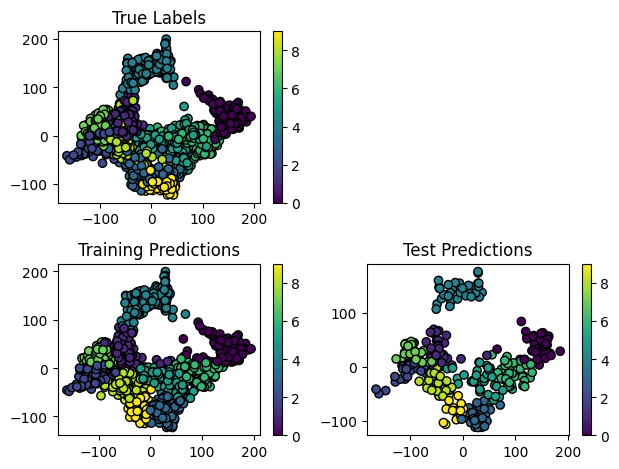

In [63]:
#plt.scatter(x_train[:,0], x_train[:,1], c=y_pred_train)
plt.figure(figsize=(13, 9))
fig, axs = plt.subplots(2, 2)


# Plot with true labels
ax = axs[0,0]
ax.scatter(X[:, 0], X[:, 1], c=digits.target, cmap='viridis', edgecolor='k')
ax.set_title('True Labels')
fig.colorbar(ax.collections[0], ax=ax)

# Plot with training predictions
ax = axs[1, 0]
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_pred_train, cmap='viridis', edgecolor='k')
ax.set_title('Training Predictions')
fig.colorbar(ax.collections[0], ax=ax)

# Plot with test predictions
ax= axs[1, 1]
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_pred_test, cmap='viridis', edgecolor='k')
ax.set_title('Test Predictions')
fig.colorbar(ax.collections[0], ax=ax)

fig.delaxes(axs[0, 1])

plt.tight_layout()
plt.show()


## I could see that the accuracy is much better if I don't use the transformed data, but the original data, with all its dimentions

In [76]:
X = digits.data
y = digits.target

x_train, x_test, y_train, y_test =  sklearn.model_selection.train_test_split(X, y, test_size = 0.2)
print(x_train.shape)

clf = LogisticRegression(solver ='sag', max_iter = 1000)
clf.fit(x_train, y_train)

(1437, 64)


LogisticRegression(max_iter=1000, solver='sag')

In [77]:
y_pred_train = clf.predict(x_train)
print("CONFUSION MATRIX: \n", confusion_matrix(y_train, y_pred_train))
print("accuracy score on train set, it should be 1 since I trained on them...: ", sklearn.metrics.accuracy_score(y_train, y_pred_train))
print ("\n------------------------\n")

y_pred_test = clf.predict(x_test)
print("CONFUSION MATRIX: \n", confusion_matrix(y_test, y_pred_test))
print("accuracy score on test set: ", sklearn.metrics.accuracy_score(y_test, y_pred_test))


CONFUSION MATRIX: 
 [[142   0   0   0   0   0   0   0   0   0]
 [  0 142   0   0   0   0   0   0   0   0]
 [  0   0 134   0   0   0   0   0   0   0]
 [  0   0   0 143   0   0   0   0   0   0]
 [  0   0   0   0 145   0   0   0   0   0]
 [  0   0   0   0   0 153   0   0   0   0]
 [  0   0   0   0   0   0 146   0   0   0]
 [  0   0   0   0   0   0   0 149   0   0]
 [  0   0   0   0   0   0   0   0 144   0]
 [  0   0   0   0   0   0   0   0   0 139]]
accuracy score on train set, it should be 1 since I trained on them...:  1.0

------------------------

CONFUSION MATRIX: 
 [[34  0  0  0  1  1  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  3 40  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  1  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  1]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  3  0  0  0  1  0  0 26  0]
 [ 1  0  0  0  0  0  0  0  0 40]]
accuracy score on test set:  0.9638888888888889
